# 06/06/19 Notebook to analyze muon real data. 
## To be merged with the main code

In [1]:
import logging
from ctapipe.image.muon.muon_diagnostic_plots import plot_muon_event

import numpy as np
from ctapipe.io import event_source
from ctapipe.io import EventSeeker
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.image.extractor import LocalPeakWindowSum
from ctapipe.image.muon.features import ring_completeness
from ctapipe.image.muon.features import npix_above_threshold
from ctapipe.image.muon.features import npix_composing_ring
from ctapipe.image.muon.muon_integrator import MuonLineIntegrate
from ctapipe.image.cleaning import tailcuts_clean

from astropy.coordinates import Angle, SkyCoord, AltAz
from ctapipe.image.muon.muon_ring_finder import ChaudhuriKunduRingFitter
from ctapipe.coordinates import CameraFrame, NominalFrame
from astropy import units as u

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 20
logger = logging.getLogger(__name__)


In [36]:
def format_axes(ax):
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(
    axis='x',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    ax.tick_params(
    axis='y',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
    
    return ax

In [37]:
# lstchain modules
from lstchain.calib.camera.r0 import LSTR0Corrections
r0calib = LSTR0Corrections(
    #pedestal_path="Data/pedestal_run436.fits",
    pedestal_path="Data/pedestal_file_run446_0000.fits",
    r1_sample_start=2,r1_sample_end=38)

In [38]:
from ctapipe.io.hdf5tableio import HDF5TableWriter, HDF5TableReader
from ctapipe.io.containers import FlatFieldContainer, WaveformCalibrationContainer, PedestalContainer

ff_data = FlatFieldContainer()
cal_data =  WaveformCalibrationContainer()
ped_data =  PedestalContainer()

dc_to_pe = []
ped_median = []

with HDF5TableReader('Calibration/calibration.hdf5') as h5_table:
#with HDF5TableReader('Calibration/calibration_466_1000_Nocut.hdf5') as h5_table:

    assert h5_table._h5file.isopen == True

    for cont in h5_table.read('/tel_0/pedestal', ped_data):
            ped_median = cont.charge_median
            #print(ped_median)
            #cont.meta()
            
    for calib in h5_table.read('/tel_0/calibration', cal_data):
            #print(calib.as_dict())
            #print(calib)
            dc_to_pe = calib['dc_to_pe']
            #plt.hist(1/calib.dc_to_pe[0], color='r', histtype='step', bins = 50, stacked=True, fill=False)
                    
h5_table.close() 

In [39]:
#source = event_source(input_url="Data/LST-1.4.Run00442.0004.fits.fz",max_events=10)
source = event_source(input_url="Data/LST-1.4.Run00442.0001.fits.fz",max_events=None)
#source = event_source(input_url="Data/LST-1.4.Run00442.0003.fits.fz",max_events=10)
#source = event_source(input_url="Data/LST-1.4.Run00453.0000.fits.fz",max_events=100)
#source = event_source(input_url="Data/LST-1.1.Run00465.0000.fits.fz",max_events=10)
#source = event_source(input_url="Data/LST-1.4.Run00439.0000.fits.fz",max_events=10)

53006
53010
53014
53018
53022
53026
53030
53034
53038
53042
53046
53050
53054
53058
53062
53066
53070
53074
53078
53082
53086
53090
53094
53098
53102
53106
53110
53114
53118
53122
53126
53130
53134
53138
53142
53146
53150
53154
53158
53162
53166
53170
53174
53178
53182
53186
53190
53194
53198
53202
53206
53210
53214
53218
53222
53226
53230
53234
53238
53242
53246
53250
53254
53258
53262
53266
53270
53274
53278
53282
53286
53290
53294
53298
53302
53306
53310
53314
53318
53322
53326
53330
53334
53338
53342
53346
53350
53354
53358
53362
53366
53370
53374
53378
53382
53386
53390
53394
53398
53402
53406
53410
53414
53418
53422
53426
53430
53434
53438
53442
53446
53450
53454
53458
53462
53466
53470
53474
53478
53482
53486
53490
53494
53498
53502
53506
53510
53514
53518
53522
53526
53530
53534
53538
53542
53546
53550
53554
53558
53562
53566
53570
53574
53578
173
Event 53578, Max: 4095.0 counts


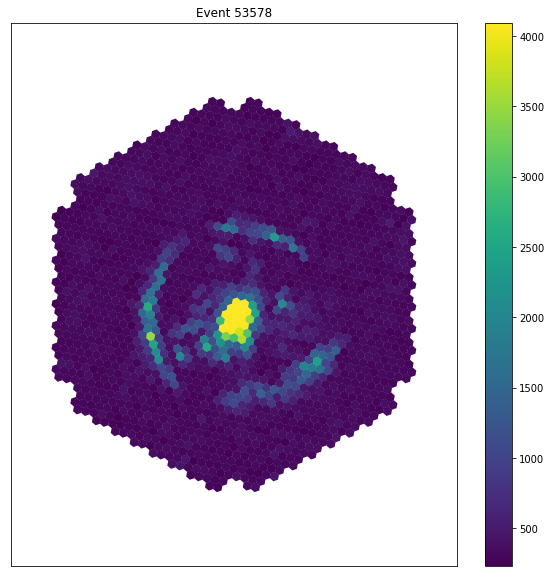

53582
53586
53590
53594
53598
53602
53606
53610
53614
53618
53622
53626
53630
53634
53638
53642
53646
53650
53654
53658
53662
53666
53670
53674
53678
53682
53686
53690
53694
53698
53702
53706
53710
53714
53718
53722
53726
53730
53734
53738
53742
53746
53750
53754
53758
53762
53766
53770
53774
53778
53782
53786
53790
53794
53798
53802
53806
53810
53814
53818
53822
53826
53830
53834
53838
53842
53846
53850
53854
53858
53862
53866
53870
53874
53878
53882
53886
53890
53894
53898
53902
53906
53910
53914
53918
53922
53926
53930
53934
53938
53942
53946
53950
53954
53958
53962
53966
53970
53974
53978
53982
53986
53990
53994
53998
54002
54006
54010
54014
54018
54022
54026
54030
54034
54038
54042
54046
54050
54054
54058
54062
54066
54070
54074
54078
54082
54086
54090
54094
54098
54102
54106
54110
54114
54118
54122
54126
54130
54134
54138
54142
54146
54150
54154
54158
54162
54166
54170
54174
54178
54182
54186
54190
54194
54198
54202
54206
54210
54214
54218
54222
54226
54230
54234
54238
54242
5424

KeyboardInterrupt: 

In [40]:
geom = CameraGeometry.from_name("LSTCam-002")
evt_id = 212082 # The id of the selected event

for i, ev in enumerate(source):
    N_modules = 7*265
    print(ev.lst.tel[0].evt.event_id)

    #if((ev.lst.tel[0].evt.event_id<19800) or (ev.lst.tel[0].evt.event_id>19860)):
    #    continue

    std_signal = np.zeros(1855)
    for pixel in range(0, N_modules):
        std_signal[pixel] = np.max(ev.r0.tel[0].waveform[0, pixel, 2:38])

    #if((np.size(std_signal[std_signal>800.] > 300)) or (np.size(std_signal[std_signal>800.]) < 1)):
    #if(np.size(std_signal[std_signal>800.] > 300)):
    if((np.size(std_signal[std_signal>800.]) > 300) or (np.size(std_signal[std_signal>800.]) < 80)):
        continue
        #print(np.size(std_signal[std_signal>800.]))
    #if(np.max(std_signal) < 500):
        
    print(np.size(std_signal[std_signal>800.]))
    print(f"Event {ev.lst.tel[0].evt.event_id}, Max: {np.max(std_signal)} counts")


    #geom = CameraGeometry.from_name("LSTCam-002")
    fig, ax = plt.subplots(figsize=(10,10))

    #disp0 = CameraDisplay(geom, ax=ax)
    disp0 = CameraDisplay(ev.inst.subarray.tels[0].camera, ax=ax)
    disp0.cmap = 'viridis'
    disp0.image = std_signal
    disp0.add_colorbar(ax=ax)

    # Establish max and min
    sort = np.argsort(std_signal)
    min_color = std_signal[sort][7] # There was one cluster off
    max_color = std_signal[sort][-2]
    max_color = np.max(std_signal)

    disp0.set_limits_minmax(min_color, max_color)
    ax.set_title(f"Event {ev.lst.tel[0].evt.event_id}")
    format_axes(ax)
    fig.savefig("Images_LST/th3000/Event_%i.png"%(ev.lst.tel[0].evt.event_id))

    plt.show()
    #if(ev.lst.tel[0].evt.event_id==evt_id):
    #    break

In [41]:
def get_xy():
    x, y = geom.pix_x, geom.pix_y

    telescope_pointing = SkyCoord(
            alt=70 * u.deg,
            az=0 * u.deg,
            frame=AltAz()
        )

    camera_coord = SkyCoord(
            x=x, y=y,
            frame=CameraFrame(
                focal_length=teldes.optics.equivalent_focal_length,
                rotation=geom.pix_rotation,
                telescope_pointing=telescope_pointing
            )
    )
    nom_coord = camera_coord.transform_to(
            NominalFrame(origin=telescope_pointing)
        )


    x = nom_coord.delta_az.to(u.deg)
    y = nom_coord.delta_alt.to(u.deg)

    return x,y

In [42]:
def fit_muon(x,y,phe):

    muonring = ChaudhuriKunduRingFitter(None)
    clean_mask = tailcuts_clean(geom, phe, picture_thresh=tailcuts[0],
                                    boundary_thresh=tailcuts[1])
    image = phe * clean_mask
    muonringparam = muonring.fit(x, y, image)

    dist = np.sqrt(np.power(x - muonringparam.ring_center_x, 2)
                       + np.power(y - muonringparam.ring_center_y, 2))
    ring_dist = np.abs(dist - muonringparam.ring_radius)
    muonringparam = muonring.fit(
            x, y, image * (ring_dist < muonringparam.ring_radius * 0.4)
        )

    dist = np.sqrt(np.power(x - muonringparam.ring_center_x, 2) +
                       np.power(y - muonringparam.ring_center_y, 2))
    ring_dist = np.abs(dist - muonringparam.ring_radius)

    muonringparam = muonring.fit(
            x, y, image * (ring_dist < muonringparam.ring_radius * 0.4)
        )
    
    return muonringparam, clean_mask, dist, image

In [43]:
def analyze_muon_event(phe):

#muon_event_param = {'TelIds': tellist,
#                        'MuonRingParams': muonringlist,
#                        'MuonIntensityParams': muonintensitylist}
#muonringlist.append(muonringparam)

    x, y = get_xy()
    muonringparam, clean_mask, dist, image = fit_muon(x,y,phe[0])

    mir_rad = np.sqrt(teldes.optics.mirror_area.to("m2") / np.pi)
    dist_mask = np.abs(dist - muonringparam.ring_radius
                    ) < muonringparam.ring_radius * 0.4
    pix_im = phe[0] * dist_mask
    nom_dist = np.sqrt(np.power(muonringparam.ring_center_x,2) 
                    + np.power(muonringparam.ring_center_y, 2))

    ctel = MuonLineIntegrate(
                mir_rad, hole_radius = 0.308 * u.m,
                pixel_width=0.1 * u.deg,
                sct_flag=False,
                secondary_radius = 0. * u.m
            )

    muonintensityoutput = ctel.fit_muon(muonringparam.ring_center_x,
                                    muonringparam.ring_center_y,
                                    muonringparam.ring_radius,
                                    x[dist_mask], y[dist_mask],
                                    phe[0][dist_mask])
    muonintensityoutput.mask = dist_mask
    idx_ring = np.nonzero(pix_im)
    muonintensityoutput.ring_completeness = ring_completeness(
                    x[idx_ring], y[idx_ring], pix_im[idx_ring],
                    muonringparam.ring_radius,
                    muonringparam.ring_center_x,
                    muonringparam.ring_center_y,
                    threshold=30,
                    bins=30)
    muonintensityoutput.ring_size = np.sum(pix_im)
    dist_ringwidth_mask = np.abs(dist - muonringparam.ring_radius
                                             ) < (muonintensityoutput.ring_width)
    pix_ringwidth_im = phe[0] * dist_ringwidth_mask
    idx_ringwidth = np.nonzero(pix_ringwidth_im)

    muonintensityoutput.ring_pix_completeness = npix_above_threshold(
                    pix_ringwidth_im[idx_ringwidth], tailcuts[0]) / len(
                    pix_im[idx_ringwidth])

    print("Impact parameter = %s"
                             "ring_width=%s, ring radius=%s"% (
                             muonintensityoutput.impact_parameter,
                             muonintensityoutput.ring_width,
                             muonringparam.ring_radius))


    
    
    


    altaz = AltAz(alt = 70 * u.deg, az = 0 * u.deg)
    flen = event.inst.subarray.tel[0].optics.equivalent_focal_length
    ring_nominal = SkyCoord(
                delta_az=muonringparam.ring_center_x,
                delta_alt=muonringparam.ring_center_y,
                frame=NominalFrame(origin=altaz)
            )

    ring_camcoord = ring_nominal.transform_to(CameraFrame(
                focal_length=flen,
                rotation=geom.pix_rotation,
                telescope_pointing=altaz))
    centroid = (ring_camcoord.x.value, ring_camcoord.y.value)
    radius = muonringparam.ring_radius
    width = muonintensityoutput.ring_width
    ringrad_camcoord = 2 * radius.to(u.rad) * flen
    ringwidthfrac = width / radius
    ringrad_inner = ringrad_camcoord * (1. - ringwidthfrac)
    ringrad_outer = ringrad_camcoord * (1. + ringwidthfrac)

    return centroid, ringrad_camcoord, ringrad_inner, ringrad_outer, muonintensityoutput, muonringparam, clean_mask


In [27]:
source = event_source(input_url="Data/LST-1.4.Run00442.0001.fits.fz",max_events=2000)
#source = event_source(input_url="Data/LST-1.4.Run00442.0004.fits.fz",max_events=None)
#source = event_source(input_url="Data/LST-1.4.Run00442.0003.fits.fz",max_events=5000)
seeker = EventSeeker(source)

# LST-1.4.Run00442.0004.fits.fz
### Muons ###
#event = seeker["212082"]
#event = seeker["212706"]
#event = seeker["212838"]
#event = seeker["214558"]
#### BIG EVENTS ####
#event = seeker["217094"]
#event = seeker["222206"]
#event = seeker["229966"]
#event = seeker["237102"]
#event = seeker["240354"]

# In "LST-1.4.Run00442.0001.fits.fz"
## Muons ##
#event = seeker["53502"]
#event = seeker["56226"]
#event = seeker["56450"]

#event = seeker["53578"]
#event = seeker["70802"]

# LST-1.4.Run00442.0003.fits.fz
#event = seeker["159214"]
#event = seeker["160754"]
#event = seeker["163282"]
#event = seeker["170742"]
#event = seeker["160230"]

#event.lst.tel[0].evt.event_id

Seeking to event by looping through events... (potentially long process)


In [28]:
r0calib.calibrate(event)
pedcorrectedsamples = event.r1.tel[0].waveform
integrator = LocalPeakWindowSum(window_shift= 4, window_width=9)
integration, pulse_time = integrator(pedcorrectedsamples)
phe = (integration - ped_median)*dc_to_pe

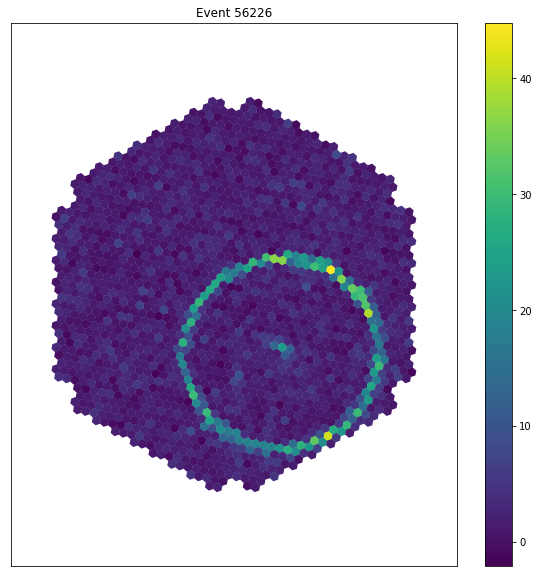

In [59]:
tailcuts = [3, 6]
teldes = event.inst.subarray.tel[0]

geom = CameraGeometry.from_name("LSTCam-002")
fig, ax = plt.subplots(figsize=(10,10))
disp0 = CameraDisplay(geom, ax=ax)
ax.set_title(f"Event {event.lst.tel[0].evt.event_id}")
format_axes(ax)
#fig.savefig("Images_LST/Event_%i.png"%(ev.lst.tel[0].evt.event_id))
#disp0.image = integration[0] * clean_mask
disp0.image = phe[0]
disp0.cmap = 'viridis'
disp0.add_colorbar(ax=ax)
fig.savefig("Images_LST/Muons/Event_%i.png"%(event.lst.tel[0].evt.event_id))

In [60]:
centroid, ringrad_camcoord, ringrad_inner, ringrad_outer, muonintensityoutput, muonringparam, clean_mask = analyze_muon_event(phe)
print("Size {:.0f}".format(muonintensityoutput.ring_size))
print("Width {:.2f}".format(muonintensityoutput.ring_width))
print("Radius {:.1f}".format(muonringparam.ring_radius))
print("Impact parameter {:.1f}".format(muonintensityoutput.impact_parameter))



/Users/rubenlopez/anaconda/envs/cta-dev/lib/python3.6/site-packages/ctapipe-0.6.2.post159-py3.6.egg/ctapipe/coordinates/__init__.py:49: MissingFrameAttributeWarning: AltAz coordinate has no obstime, assuming same frame
  MissingFrameAttributeWarning,
/Users/rubenlopez/anaconda/envs/cta-dev/lib/python3.6/site-packages/ctapipe-0.6.2.post159-py3.6.egg/ctapipe/coordinates/__init__.py:57: MissingFrameAttributeWarning: Horizontal coordinate has no location, assuming same frame
  MissingFrameAttributeWarning,
/Users/rubenlopez/anaconda/envs/cta-dev/lib/python3.6/site-packages/ctapipe-0.6.2.post159-py3.6.egg/ctapipe/image/muon/muon_integrator.py:102: RuntimeWarning: invalid value encountered in sqrt
  chord = 2. * radius * np.sqrt(chord)


Impact parameter = 1.7678844154727134 mring_width=0.11300763198018143 deg, ring radius=1.206378789343893 deg
Size 3656
Width 0.11 deg
Radius 1.2 deg
Impact parameter 1.8 m


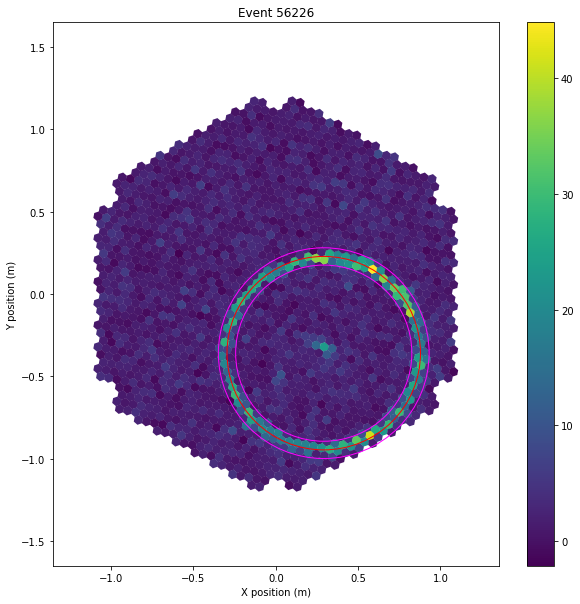

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
disp0 = CameraDisplay(geom, ax=ax)
#disp0.image = phe[0] * clean_mask
disp0.image = phe[0]
disp0.cmap = 'viridis'
disp0.add_colorbar(ax=ax)
disp0.add_ellipse(centroid, ringrad_camcoord.value,
                  ringrad_camcoord.value, 0., 0., color="red")
disp0.add_ellipse(centroid, ringrad_inner.value,
                                    ringrad_inner.value, 0., 0.,
                                    color="magenta")
disp0.add_ellipse(centroid, ringrad_outer.value,
                                    ringrad_outer.value, 0., 0.,
                                    color="magenta")
ax.set_title(f"Event {event.lst.tel[0].evt.event_id}")
fig.savefig("Images_LST/Muons/Event_%i_fitted.png"%(event.lst.tel[0].evt.event_id))
plt.show()

In [45]:
source = event_source(input_url="Data/LST-1.4.Run00442.0001.fits.fz",max_events=None)

In [2]:
### CALIBRATED ###

geom = CameraGeometry.from_name("LSTCam-002")
#evt_id = 53502 # The id of the selected event
evt_id = 56226
#evt_id = 56450
for i, event in enumerate(source):
    N_modules = 7*265
    print(event.lst.tel[0].evt.event_id)

    #if((ev.lst.tel[0].evt.event_id<19800) or (ev.lst.tel[0].evt.event_id>19860)):
    #    continue
    std_signal = np.zeros(1855)
    for pixel in range(0, N_modules):
        std_signal[pixel] = np.max(event.r0.tel[0].waveform[0, pixel, 2:38])

    r0calib.calibrate(event)
    pedcorrectedsamples = event.r1.tel[0].waveform
    integrator = LocalPeakWindowSum(window_shift= 4, window_width=9)
    integration, pulse_time = integrator(pedcorrectedsamples)
    phe = (integration - ped_median)*dc_to_pe

    if((np.size(phe[0][phe[0]>20.]) > 300) or (np.size(phe[0][phe[0]>20.]) < 50)):
        continue
    
    if(np.max(std_signal) < 0):
        continue  
    print(f"Event {event.lst.tel[0].evt.event_id}, Max: {np.max(std_signal)} counts")

    #geom = CameraGeometry.from_name("LSTCam-002")
    fig, ax = plt.subplots(figsize=(10,10))

    #disp0 = CameraDisplay(geom, ax=ax)
    disp0 = CameraDisplay(event.inst.subarray.tels[0].camera, ax=ax)
    disp0.cmap = 'viridis'
    disp0.image = phe[0]
    disp0.add_colorbar(ax=ax, label='Charge [phe]')

    # Establish max and min
    min_color = np.min(phe[0]) # There was one cluster off
    max_color = np.max(phe[0])

    disp0.set_limits_minmax(min_color, max_color)
    ax.set_title(f"Event {event.lst.tel[0].evt.event_id}")
    format_axes(ax)
    #fig.savefig("Images_LST/Event_%i.png"%(ev.lst.tel[0].evt.event_id))
    fig.savefig("Images_LST/Calibrated/Event_%i.png"%(event.lst.tel[0].evt.event_id))
    #fig.savefig("Images_LST/2018_12_14/Event_%i.png" % (ev.lst.tel[0].evt.event_id))

    plt.show()
    if(event.lst.tel[0].evt.event_id==evt_id):
        break

SyntaxError: invalid syntax (<ipython-input-2-36928980d3cc>, line 28)

In [1]:
####### MOVIE #########

# If you want to make a movie with all the slices
std_signal = np.zeros(1855)
for pixel in range(0, N_modules):
    std_signal[pixel] = np.max(event.r0.tel[0].waveform[1, pixel, 2:38])

max_color = np.max(std_signal)
min_color = np.min(std_signal)

for cell in range(1,39):
    print("cell",cell)
    fig, ax = plt.subplots(figsize=(10,10))
    disp0 = CameraDisplay(geom, ax=ax)
    disp0.cmap = 'viridis'
    disp0.add_colorbar(ax=ax)
    disp0.image = event.r0.tel[0].waveform[0,:,cell]
    disp0.set_limits_minmax(min_color, max_color)
    format_axes(ax)
    ax.set_title(f"Event {event.lst.tel[0].evt.event_id}, Time {cell} ns")
    fig.savefig("Images_LST/for_gifs/Event_{:02d}_cell{:02d}.png".format(event.lst.tel[0].evt.event_id,cell))
    #plt.show()

NameError: name 'np' is not defined